# From Biological to Artificial Neurons

## The Perceptron

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("Solarize_Light2")

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-2-27005104d343>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

# Implementing MLPs with Keras

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [16]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [9]:
class_names = ["T-shirts/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [30]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7040 - accuracy: 0.7721 - val_loss: 0.5073 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4886 - accuracy: 0.8289 - val_loss: 0.4423 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4439 - accuracy: 0.8444 - val_loss: 0.4189 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4175 - accuracy: 0.8535 - val_loss: 0.3965 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3982 - accuracy: 0.8602 - val_loss: 0.4271 - val_accuracy: 0.8524
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8652 - val_loss: 0.3907 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3676 - accuracy: 0.8709 - val_loss: 0.3727 - val_accuracy:

(0.0, 1.0)

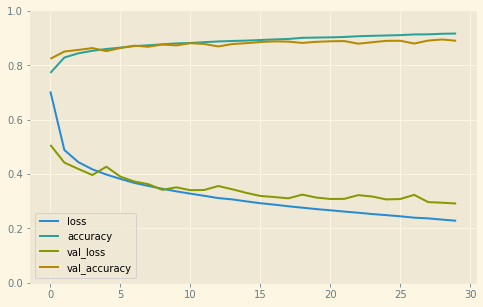

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 57.1649 - accuracy: 0.8527


[57.16485595703125, 0.8526999950408936]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U12')

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
X_train.shape

(11610, 8)

In [47]:
X_train.shape[1:]

(8,)

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2723 - val_loss: 0.5694
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5186 - val_loss: 0.4812
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4696 - val_loss: 0.4626
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4502 - val_loss: 0.4430
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4357 - val_loss: 0.4337
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4271 - val_loss: 0.4239
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.4164
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.4121
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4060 - val_loss: 0.4055
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3990 - val_loss: 0.4033

In [49]:
y_pred

array([[2.428899 ],
       [3.97056  ],
       [4.1033306]], dtype=float32)

## Building Complex Models Using the Functional API

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [54]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1004 - val_loss: 1.0254
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8860 - val_loss: 0.7812
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7337 - val_loss: 0.6862
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6683 - val_loss: 0.6416
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6288 - val_loss: 0.6137
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5996 - val_loss: 0.5892
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5779 - val_loss: 0.5709
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5627 - val_loss: 0.5649
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5481 - val_loss: 0.5547
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5368 - val_loss: 0.5370

array([[2.3043237],
       [3.8492827],
       [4.475884 ]], dtype=float32)

In [64]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [65]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
mse_test = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
y_pred_main

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3979 - output_loss: 2.1134 - aux_output_loss: 4.9582 - val_loss: 1.2537 - val_output_loss: 0.9507 - val_aux_output_loss: 3.9800
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0464 - output_loss: 0.8042 - aux_output_loss: 3.2263 - val_loss: 0.8997 - val_output_loss: 0.7062 - val_aux_output_loss: 2.6409
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8338 - output_loss: 0.6739 - aux_output_loss: 2.2726 - val_loss: 0.7734 - val_output_loss: 0.6336 - val_aux_output_loss: 2.0317
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7447 - output_loss: 0.6208 - aux_output_loss: 1.8597 - val_loss: 0.7149 - val_output_loss: 0.5965 - val_aux_output_loss: 1.7808
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6985 - output_loss: 0.5890 - aux_output_loss: 1.6837 - val_loss: 0.6821 - val_output_loss: 0.5728 - val_aux_

array([[2.3394253],
       [4.002406 ],
       [4.249334 ]], dtype=float32)

In [66]:
y_pred_aux

array([[2.516293 ],
       [2.011349 ],
       [1.8996617]], dtype=float32)

## Using the Subclassing API to Build Dynamic Models

In [67]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

## Using TensorBoard for Visualization

In [68]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_07_06-08_50_13'

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0734 - val_loss: 0.7007
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.5231 - val_loss: 0.9652
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4972 - val_loss: 0.4587
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4522 - val_loss: 0.4407
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4365 - val_loss: 0.4288
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4373 - val_loss: 0.4110
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4171 - val_loss: 0.4122
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.3995
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3998 - val_loss: 0.3953
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 0.4029

In [73]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [76]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [79]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [80]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3033 - val_loss: 0.6234
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6088 - val_loss: 0.5692
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5593 - val_loss: 0.5337
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5278 - val_loss: 0.5116
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5062 - val_loss: 0.4935
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4894 - val_loss: 0.4772
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4783 - val_loss: 0.4691
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4687 - val_loss: 0.4646
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4611 - val_loss: 0.4586
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4570 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.3670
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.3656
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3543 - val_loss: 0.3628
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3531 - val_loss: 0.3627
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3522 - val_loss: 0.3659
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3520 - val_loss: 0.3612
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3511 - val_loss: 0.3625
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3507 - val_loss: 0.3609
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3509 - val_loss: 0.3576
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3496 - val_loss: 

In [81]:
mse_test

-0.3537133038043976

In [83]:
import math

log_b, log_a = math.log(3e-4), math.log(3e-2)
log_b, log_a

(-8.111728083308073, -3.506557897319982)

In [86]:
(math.log(3e-3) - log_a) / (log_b - log_a)

0.5000000000000001

In [91]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 6.1546 - val_loss: 4.7012
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.5564 - val_loss: 2.7428
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.1979 - val_loss: 1.7302
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4817 - val_loss: 1.2039
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1007 - val_loss: 0.9304
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8966 - val_loss: 0.7872
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7852 - val_loss: 0.7114
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7230 - val_loss: 0.6701
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6865 - val_loss: 0.6466
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6641 - val_lo

242/242 [==============================] - 0s 1ms/step - loss: 0.5237 - val_loss: 0.5280
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5235 - val_loss: 0.5280
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5233 - val_loss: 0.5279
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5232 - val_loss: 0.5277
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5230 - val_loss: 0.5277
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5229 - val_loss: 0.5276
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5228 - val_loss: 0.5275
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5226 - val_loss: 0.5277
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5225 - val_loss: 0.5276
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5224 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5608 - val_loss: 0.5492
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5591 - val_loss: 0.5478
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5576 - val_loss: 0.5472
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5561 - val_loss: 0.5461
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5546 - val_loss: 0.5448
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5532 - val_loss: 0.5444
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5520 - val_loss: 0.5434
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5507 - val_loss: 0.5431
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5496 - val_loss: 0.5425
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5484 - val_loss: 

Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5213 - val_loss: 0.5275
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5207 - val_loss: 0.5333
Epoch 30/100
121/121 [==============================] - 0s 754us/step - loss: 0.5319
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 2.9222 - val_loss: 0.8415
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7099 - val_loss: 0.6102
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6149 - val_loss: 0.5841
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5906 - val_loss: 0.5865
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5730 - val_loss: 0.5601
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5663 - val_loss: 0.5583
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5536 - val_loss: 0.5472
Epoc

242/242 [==============================] - 0s 1ms/step - loss: 0.7163 - val_loss: 0.6640
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6873 - val_loss: 0.6443
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6678 - val_loss: 0.6314
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6541 - val_loss: 0.6225
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6441 - val_loss: 0.6162
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6362 - val_loss: 0.6113
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6298 - val_loss: 0.6072
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6244 - val_loss: 0.6038
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6196 - val_loss: 0.6007
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6153 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5285 - val_loss: 0.5364
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5283 - val_loss: 0.5365
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5280 - val_loss: 0.5363
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5278 - val_loss: 0.5362
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5276 - val_loss: 0.5361
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5273 - val_loss: 0.5359
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5271 - val_loss: 0.5359
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5269 - val_loss: 0.5358
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5267 - val_loss: 0.5356
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5265 - val_loss: 

Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5360 - val_loss: 0.5521
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5355 - val_loss: 0.5513
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5351 - val_loss: 0.5521
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5346 - val_loss: 0.5510
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5342 - val_loss: 0.5512
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5337 - val_loss: 0.5514
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5335 - val_loss: 0.5517
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5331 - val_loss: 0.5513
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5327 - val_loss: 0.5502
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5324

242/242 [==============================] - 0s 1ms/step - loss: 0.5792 - val_loss: 0.6053
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5777 - val_loss: 0.6019
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5763 - val_loss: 0.5992
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5751 - val_loss: 0.5987
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5737 - val_loss: 0.5972
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5723 - val_loss: 0.5949
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5713 - val_loss: 0.5950
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5700 - val_loss: 0.5947
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5688 - val_loss: 0.5947
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5675 - val_loss: 

Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3167 - val_loss: 1.3291
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3166 - val_loss: 1.3291
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3166 - val_loss: 1.3292
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3165 - val_loss: 1.3292
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3165 - val_loss: 1.3292
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3165 - val_loss: 1.3292
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3165 - val_loss: 1.3292
Epoch 35/100
121/121 [==============================] - 0s 739us/step - loss: 1.3065
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.9534 - val_loss: 4.0915
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.5624 - val_loss: 3.1001

242/242 [==============================] - 0s 1ms/step - loss: 0.5838 - val_loss: 0.5809
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5817 - val_loss: 0.5789
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5796 - val_loss: 0.5768
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5774 - val_loss: 0.5745
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5753 - val_loss: 0.5724
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5732 - val_loss: 0.5698
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5711 - val_loss: 0.5681
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5688 - val_loss: 0.5670
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5669 - val_loss: 0.5637
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5648 - val_loss: 

Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5516 - val_loss: 0.5592
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5499 - val_loss: 0.5596
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5481 - val_loss: 0.5598
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5467 - val_loss: 0.5559
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5452 - val_loss: 0.5555
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5436 - val_loss: 0.5533
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5421 - val_loss: 0.5544
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5407 - val_loss: 0.5520
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5394 - val_loss: 0.5507
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5379

242/242 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.4440
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4396 - val_loss: 0.4426
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4382 - val_loss: 0.4420
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4370 - val_loss: 0.4422
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4363 - val_loss: 0.4402
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4351 - val_loss: 0.4392
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4339 - val_loss: 0.4386
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4329 - val_loss: 0.4369
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4318 - val_loss: 0.4372
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4310 - val_loss: 

Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5283 - val_loss: 0.5328
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5226 - val_loss: 0.5234
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5154 - val_loss: 0.5192
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5088 - val_loss: 0.5119
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5036 - val_loss: 0.5045
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4995 - val_loss: 0.5026
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4975 - val_loss: 0.5001
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4924 - val_loss: 0.4914
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4895 - val_loss: 0.4929
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4867

242/242 [==============================] - 0s 1ms/step - loss: 0.4152 - val_loss: 0.4095
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4125 - val_loss: 0.4080
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4130 - val_loss: 0.4086
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4121 - val_loss: 0.4057
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4117 - val_loss: 0.4071
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4106 - val_loss: 0.4048
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4097 - val_loss: 0.4054
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4094 - val_loss: 0.4041
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4127 - val_loss: 0.4038
Epoch 100/100
121/121 [==============================] - 0s 746us/step - loss: 0.4079
Epoch 1/1

Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3979 - val_loss: 0.3990
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3978 - val_loss: 0.3982
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3961 - val_loss: 0.3981
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3961 - val_loss: 0.3972
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 0.3966
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3946 - val_loss: 0.3963
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3935 - val_loss: 0.3955
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3932 - val_loss: 0.3946
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3951 - val_loss: 0.3967
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3924

242/242 [==============================] - 0s 2ms/step - loss: 0.3356 - val_loss: 0.3568
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3344 - val_loss: 0.3536
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3332 - val_loss: 0.3542
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3326 - val_loss: 0.3548
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3312 - val_loss: 0.3543
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3301 - val_loss: 0.3503
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3285 - val_loss: 0.3513
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3272 - val_loss: 0.3579
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3262 - val_loss: 0.3471
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3263 - val_loss: 

Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3756 - val_loss: 0.3780
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3734 - val_loss: 0.3775
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3710 - val_loss: 0.3746
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3686 - val_loss: 0.3739
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3662 - val_loss: 0.3722
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3645 - val_loss: 0.3729
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3627 - val_loss: 0.3684
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3607 - val_loss: 0.3666
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3585 - val_loss: 0.3668
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3566

242/242 [==============================] - 0s 2ms/step - loss: 0.4557 - val_loss: 0.4511
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4472 - val_loss: 0.4474
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4408 - val_loss: 0.4376
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4347 - val_loss: 0.4305
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4303 - val_loss: 0.4446
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4256 - val_loss: 0.4231
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4203 - val_loss: 0.4321
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4172 - val_loss: 0.4203
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4127 - val_loss: 0.4139
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4098 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3007 - val_loss: 0.3273
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3000 - val_loss: 0.3226
Epoch 91/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2991 - val_loss: 0.3267
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2998 - val_loss: 0.3277
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2977 - val_loss: 0.3230
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3009 - val_loss: 0.3207
Epoch 95/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2970 - val_loss: 0.3201
Epoch 96/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2958 - val_loss: 0.3184
Epoch 97/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2981 - val_loss: 0.3206
Epoch 98/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2939 - val_loss: 

Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5349 - val_loss: 0.5396
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5344 - val_loss: 0.5392
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5338 - val_loss: 0.5388
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5333 - val_loss: 0.5385
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5329 - val_loss: 0.5382
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5324 - val_loss: 0.5379
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5320 - val_loss: 0.5377
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5315 - val_loss: 0.5372
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5311 - val_loss: 0.5371
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5307

242/242 [==============================] - 0s 1ms/step - loss: 0.5570 - val_loss: 0.5754
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5559 - val_loss: 0.5765
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5547 - val_loss: 0.5758
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5536 - val_loss: 0.5736
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5526 - val_loss: 0.5733
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5516 - val_loss: 0.5722
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5505 - val_loss: 0.5704
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5497 - val_loss: 0.5711
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5487 - val_loss: 0.5696
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5480 - val_loss: 

Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5665 - val_loss: 0.5522
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5647 - val_loss: 0.5508
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5629 - val_loss: 0.5494
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5613 - val_loss: 0.5482
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5596 - val_loss: 0.5471
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5581 - val_loss: 0.5459
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5567 - val_loss: 0.5450
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5553 - val_loss: 0.5442
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5539 - val_loss: 0.5431
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5527

242/242 [==============================] - 0s 1ms/step - loss: 0.3855 - val_loss: 0.3924
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3826 - val_loss: 0.3895
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3793 - val_loss: 0.3924
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3785 - val_loss: 0.3884
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3760 - val_loss: 0.3862
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3734 - val_loss: 0.3835
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3725 - val_loss: 0.3816
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3691 - val_loss: 0.3805
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3682 - val_loss: 0.3753
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3662 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.6565 - val_loss: 0.6258
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5851 - val_loss: 0.5618
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5265 - val_loss: 0.5063
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4914 - val_loss: 0.4833
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4745 - val_loss: 0.4625
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4572 - val_loss: 0.4554
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4482 - val_loss: 0.4439
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4424 - val_loss: 0.4373
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4367 - val_loss: 0.4328
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4306 - val_loss: 0.4297


242/242 [==============================] - 0s 1ms/step - loss: 0.3102 - val_loss: 0.3240
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3138 - val_loss: 0.3279
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3055 - val_loss: 0.3291
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3056 - val_loss: 0.3301
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3052 - val_loss: 0.3207
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3215 - val_loss: 0.3237
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3043 - val_loss: 0.3213
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3042 - val_loss: 0.3252
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3034 - val_loss: 0.3174
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3010 - val_loss: 

Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3251 - val_loss: 0.3435
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3252 - val_loss: 0.3375
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3218 - val_loss: 0.3371
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3236 - val_loss: 0.3337
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3198 - val_loss: 0.3438
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3185 - val_loss: 0.3371
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3199 - val_loss: 0.3491
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3238 - val_loss: 0.3370
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3196 - val_loss: 0.3465
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3332

242/242 [==============================] - 0s 1ms/step - loss: 0.4409 - val_loss: 0.4446
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4398 - val_loss: 0.4448
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4387 - val_loss: 0.4435
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4374 - val_loss: 0.4425
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4364 - val_loss: 0.4419
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4355 - val_loss: 0.4407
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4345 - val_loss: 0.4391
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4334 - val_loss: 0.4384
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4326 - val_loss: 0.4371
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4317 - val_loss: 

Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4798 - val_loss: 0.4867
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4771 - val_loss: 0.4793
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4741 - val_loss: 0.4771
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4716 - val_loss: 0.4747
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4695 - val_loss: 0.4727
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4672 - val_loss: 0.4701
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4653 - val_loss: 0.4682
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4633 - val_loss: 0.4653
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4616 - val_loss: 0.4630
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4596

121/121 [==============================] - 0s 764us/step - loss: 0.4074
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8328 - val_loss: 0.9855
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8357 - val_loss: 0.7865
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7321 - val_loss: 0.7315
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6901 - val_loss: 0.6884
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6598 - val_loss: 0.6595
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6338 - val_loss: 0.6314
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6132 - val_loss: 0.6101
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5912
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5793 - val_loss: 0.5759
Epoch 10/100
242/24

242/242 [==============================] - 0s 1ms/step - loss: 0.4188 - val_loss: 0.4160
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4183 - val_loss: 0.4155
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.4150
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4173 - val_loss: 0.4138
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4166 - val_loss: 0.4138
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4161 - val_loss: 0.4131
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4153 - val_loss: 0.4135
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4149 - val_loss: 0.4130
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4146 - val_loss: 0.4121
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4132 - val_loss: 

Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2712 - val_loss: 0.2939
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2763 - val_loss: 0.2967
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2728 - val_loss: 0.3027
Epoch 63/100
121/121 [==============================] - 0s 766us/step - loss: 0.3215
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3933 - val_loss: 0.6417
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [============

/root/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.5307411  -0.52548724 -0.53626424 -0.77802014 -0.40393898 -0.32035246
 -0.53284063 -0.32046404 -0.41544727         nan]
  warnings.warn(


363/363 [==============================] - 1s 2ms/step - loss: 1.2482 - val_loss: 0.6890
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6394 - val_loss: 0.6048
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5744 - val_loss: 0.5480
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5297 - val_loss: 0.5069
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4974 - val_loss: 0.4765
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4739 - val_loss: 0.4618
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4571 - val_loss: 0.4452
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4441 - val_loss: 0.4371
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4341 - val_loss: 0.4333
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4294 - val_loss: 0.4206
E

363/363 [==============================] - 1s 1ms/step - loss: 0.2861 - val_loss: 0.3025
Epoch 82/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2846 - val_loss: 0.3111
Epoch 83/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2825 - val_loss: 0.3052
Epoch 84/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2826 - val_loss: 0.3031
Epoch 85/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2815 - val_loss: 0.3007
Epoch 86/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2828 - val_loss: 0.3019
Epoch 87/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2877 - val_loss: 0.3064
Epoch 88/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2804 - val_loss: 0.3031
Epoch 89/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2802 - val_loss: 0.2998
Epoch 90/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2797 - val_loss: 

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb42427f8e0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb42427fc10>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})